# Теория вероятностей и математическая статистика

## Урок 4

## Непрерывные случайные величины. Функция распределения и функция плотности. Нормальное распределение. Центральная предельная теорема

### Дополнительные материалы

__Равномерное распределение__

Непрерывная случайная величина $X$ имеет __равномерное распределение__ на отрезке $[a, b]$, если её плотность внутри этого отрезка постоянна, а вне этого отрезка равна $0$. Другими словами:   
$$
f(x) = \begin{cases}
\dfrac{1}{b - a}, & x \in [a, b], \\
0, & x \not\in [a, b].
\end{cases}
$$

Не путать с _дискретным_ равномерным распределением.

Математическое ожидание и дисперсия равномерного распределения:

$$M(X) = \dfrac{a + b}{2}, \:\: D(X) = \dfrac{(b - a)^2}{12}$$

Функция распределения:
$$
F(x) = \begin{cases}
0, & x < a, \\
\dfrac{x - a}{b - a}, & x \in [a, b], \\
1, & x > b.
\end{cases}
$$

В природе равномерное распределение всплывает не частно, однако, у него есть важное практическое применение.

Имея выборку из равномерного распределения, можно получить с её помощью __выборку из произвольного распределения__. Нужно лишь знать квантильную функцию этого распределения.

Пусть $X = (x_1, \dots, x_n)$ — выборка из равномерного распределения с параметрами $a = 0$, $b = 1$, а $Y$ — распределение, выборку из которого требуется сгенерировать. Пусть $F_Y^{-1}(x)$ — квантильная функция этого распределения. Тогда выборка
$$F_Y^{-1} \left( X \right) = \left( F_Y^{-1} \left( x_1 \right), \dots, F_Y^{-1} \left( x_n \right) \right)$$
имеет распределение $Y$.

__Пример__

Сгенерируем выборку из равномерного распределения с параметрами $a = 0$, $b = 1$, а затем попробуем с её помощью получить выборку из нормального распределения с параметрами $\mu = 8$, $\sigma = 2$.

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

(array([111., 113., 101.,  91.,  82.,  98., 105.,  91., 109.,  99.]),
 array([7.81814223e-04, 1.00526961e-01, 2.00272109e-01, 3.00017256e-01,
        3.99762403e-01, 4.99507550e-01, 5.99252697e-01, 6.98997845e-01,
        7.98742992e-01, 8.98488139e-01, 9.98233286e-01]),
 <BarContainer object of 10 artists>)

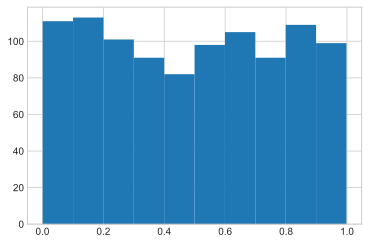

In [2]:
uniform_samples = np.random.uniform(size=1000)

plt.hist(uniform_samples);

Квантильную функцию нужного распределения можно получить с помощью `scipy.stats`:

In [3]:
def quantile_function(x: float) -> float:
    """Квантильная функция нормального распределения
    с параметрами `mu = 8`, `sigma = 2`.
    """
    
    return stats.norm.ppf(x, loc=8, scale=2)

Применяем квантильную функцию к выборке из равномерного распределения. Ниже изобразим гистограмму получившейся выборки, а также нарисуем поверх функцию плотности соответствующего распределения:

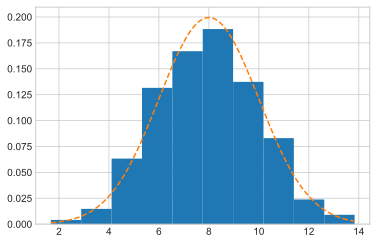

In [4]:
normal_samples = quantile_function(uniform_samples)

plt.hist(normal_samples, density=True)

x = np.linspace(normal_samples.min(), normal_samples.max(), 1000)
plt.plot(x, stats.norm.pdf(x, loc=8, scale=2), ls='dashed')

__Распределение Стьюдента__

В статистике часто приходится работать с выборочными средними. Например, оценивать средние показатели, средние ошибки и пр. Как именно это делается, мы поговорим на следующем уроке.

В случае с нормальным распределением всё практически идеально за счёт его __устойчивости__. Это означает, что с нормальными распределениями можно проводить различные арифметические операции, и нормальное распределение останется нормальным.

В частности, если дана выборка $X = \left( X_1, \dots, X_n \right)$ из нормального распределения с параметрами $\mu$, $\sigma$, то распределение выборочного среднего $\overline{X}$ также нормально с параметрами
$$\mu, \:\: \sigma / \sqrt{n},$$
где $n$ — размер выборки.

Пойдём немного дальше. Рассмотрим статистику
$$Z = \dfrac{\overline{X} - \mu}{\sigma / \sqrt{n}}$$

Здесь мы из выборочного среднего $\overline{X}$ сначала вычитаем $\mu$, а затем делим весь результат на $\sigma / \sqrt{n}$ — число, которое является средним квадратическим отклонением распределения $\overline{X}$. В силу арифметических свойств нормального распределения, статистика $Z$ имеет стандартное нормальное распределение.

Указанная выше статистика так и называется: __Z-статистика__. Она часто используется в статистических методах.

Однако, у Z-статистики есть один изъян: она предполагает, что нам заранее известен параметр $\sigma$ распределения нашей выборки. На практике такое случается довольно редко: как правило, нам просто дана выборка, и всё.

А что если мы попробуем параметр $\sigma$ в формуле Z-статистики заменить на его оценку $\sigma_X$, сделанную по выборке? Получится __t-статистика__:
$$t = \dfrac{\overline{X} - \mu}{\sigma_X / \sqrt{n}}$$

Такая статистика и используется в ситуациях, когда параметр $\sigma$ нам не дан. Эта статистика имеет несколько иное распределение, а именно __распределение Стьюдента__. Распределение Стьюдента имеет один параметр $df$, равный $n - 1$, где $n$ — число элементов в выборке.

Визуально графики распределения Стьюдента похожи на графики нормального распределения, однако, они немного отличаются для небольших $n$. Для $n > 30$ отличие уже малозаметно.

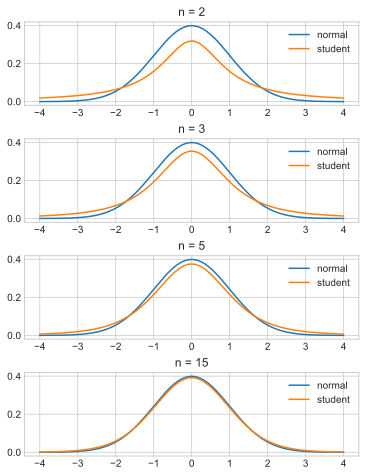

In [5]:
fig, axes = plt.subplots(nrows=4)
fig.set_size_inches(6, 8)
fig.subplots_adjust(hspace=0.4)

ns = [2, 3, 5, 15]
x = np.linspace(-4, 4, 1000)

for n, ax in zip(ns, axes):
    ax.plot(x, stats.norm.pdf(x), label='normal')
    ax.plot(x, stats.t.pdf(x, df=n - 1), label='student')
    
    ax.legend()
    ax.set_title(f'n = {n}')